In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

In [2]:
import matplotlib.pyplot as plt

In [3]:
dist_df = pd.read_csv('/scratch/ab9738/epod-nyu-delhi-pollution/data/combined_distances.csv')

In [4]:
gov_ids = []
kai_ids = []
for mid in list(dist_df['Monitor ID']):
    if('DPCC' in mid or 'CPCB' in mid or 'IMD' in mid):
        gov_ids.append(mid)
    else:
        kai_ids.append(mid)

In [5]:
dist_df = dist_df.set_index(['Monitor ID'])

In [6]:
kg_dist = dist_df.drop(columns=kai_ids, index=gov_ids)

In [7]:
kg_dict = {}

In [8]:
for kai in kai_ids:
    gov = kg_dist.loc[kai].sort_values().index[0]
    kg_dict[kai] = gov

In [9]:
kg_dict

{'113E': 'NehruNagar_DPCC',
 '1FD7': 'RKPuram_DPCC',
 '20CA': 'RKPuram_DPCC',
 '2E9C': 'SriAurobindoMarg_DPCC',
 '3ACF': 'SriAurobindoMarg_DPCC',
 '498F': 'Sirifort_CPCB',
 '4BE7': 'Sirifort_CPCB',
 '56C3': 'Sirifort_CPCB',
 '5D7A': 'AyaNagar_IMD',
 '603A': 'MandirMarg_DPCC',
 '72CA': 'DKSSR_DPCC',
 '8E2A': 'AyaNagar_IMD',
 '91B8': 'SriAurobindoMarg_DPCC',
 '97D7': 'RKPuram_DPCC',
 'A838': 'MDCNS_DPCC',
 'A9BE': 'Sirifort_CPCB',
 'BB4A': 'RKPuram_DPCC',
 'BC46': 'Patparganj_DPCC',
 'BFDC': 'SriAurobindoMarg_DPCC',
 'C0A7': 'AyaNagar_IMD',
 'CBC7': 'MandirMarg_DPCC',
 'D385': 'RKPuram_DPCC',
 'D804': 'Sirifort_CPCB',
 'DF07': 'NehruNagar_DPCC',
 'E1F8': 'JNS_DPCC',
 'E47A': 'Sirifort_CPCB',
 'E486': 'CRRIMathuraRoad_IMD',
 'E8E4': 'RKPuram_DPCC',
 'EAC8': 'SriAurobindoMarg_DPCC'}

In [10]:
gov_df = pd.read_csv('/scratch/ab9738/epod-nyu-delhi-pollution/data/govdata/govdata_1H_20180501_20201101.csv')

In [11]:
gov_df = gov_df.drop(columns=['AT','RH','WD','WS'])

In [12]:
kai_df = pd.read_csv('/scratch/ab9738/epod-nyu-delhi-pollution/data/kaiterra/kaiterra_fieldeggid_1H_20180501_20201101.csv')

In [20]:
filepath_root = '/scratch/ab9738/epod-nyu-delhi-pollution/'
filepath_locs_kai = filepath_root+'data/kaiterra/kaiterra_locations.csv'
filepath_locs_gov = filepath_root+'data/govdata/govdata_locations.csv'

locs_kai = pd.read_csv(filepath_locs_kai, index_col=[0])
locs_kai['Type'] = 'Kaiterra'
locs_gov = pd.read_csv(filepath_locs_gov, index_col=[0])
locs_gov['Type'] = 'Govt'
locs = pd.merge(locs_kai, locs_gov, how='outer',\
                on=['Monitor ID', 'Latitude', 'Longitude', 'Location', 'Type'], copy=False)

In [13]:
def avg_win(wind):
    return(wind.mean())

113E NehruNagar_DPCC distance: 2557 pm10_corr: 0.8703961709828115 pm25_corr: 0.9362970415717743
1FD7 RKPuram_DPCC distance: 440 pm10_corr: 0.7268872428281805 pm25_corr: 0.8504394637639172
20CA RKPuram_DPCC distance: 2824 pm10_corr: 0.8202293890822135 pm25_corr: 0.9192290198958987
2E9C SriAurobindoMarg_DPCC distance: 947 pm10_corr: 0.8717243358558767 pm25_corr: 0.8748151814250934
3ACF SriAurobindoMarg_DPCC distance: 1425 pm10_corr: 0.897545005690814 pm25_corr: 0.9841115346947567
498F Sirifort_CPCB distance: 1967 pm10_corr: 0.5302764986223845 pm25_corr: 0.8202943542641806
4BE7 Sirifort_CPCB distance: 1949 pm10_corr: 0.6068330298369005 pm25_corr: 0.9512570015912012
56C3 Sirifort_CPCB distance: 809 pm10_corr: 0.701438311596435 pm25_corr: 0.9628845364244707
5D7A AyaNagar_IMD distance: 1614 pm10_corr: 0.6531859644387169 pm25_corr: 0.504288545850738
603A MandirMarg_DPCC distance: 3919 pm10_corr: 0.5031092381571455 pm25_corr: 0.9122475982479885
72CA DKSSR_DPCC distance: 6882 pm10_corr: 0.81208

/state/partition1/job-21236570/ipykernel_4006592/356926979.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(10,7))


D804 Sirifort_CPCB distance: 1123 pm10_corr: 0.517322070567803 pm25_corr: 0.8963075849933219
DF07 NehruNagar_DPCC distance: 1497 pm10_corr: 0.8639610522760465 pm25_corr: 0.9635919845917681
E1F8 JNS_DPCC distance: 964 pm10_corr: 0.7361759623793764 pm25_corr: 0.9746892966876066
E47A Sirifort_CPCB distance: 1227 pm10_corr: 0.4477011450070341 pm25_corr: 0.3399794105763177
E486 CRRIMathuraRoad_IMD distance: 9794 pm10_corr: 0.753636346775708 pm25_corr: 0.9280938225998815
E8E4 RKPuram_DPCC distance: 1056 pm10_corr: 0.8850820814019842 pm25_corr: 0.9403130062717651
EAC8 SriAurobindoMarg_DPCC distance: 962 pm10_corr: 0.7610213953926255 pm25_corr: 0.9489326038113074


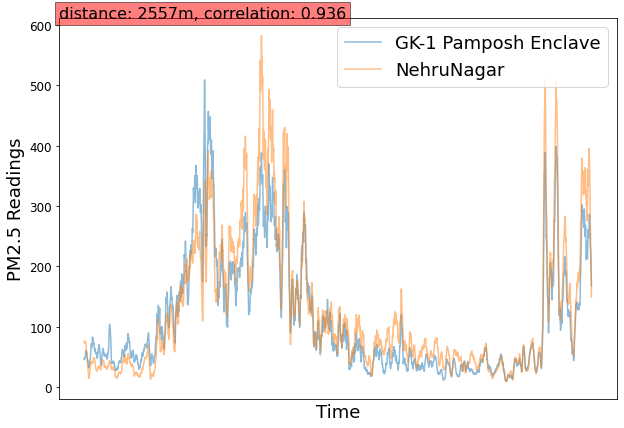

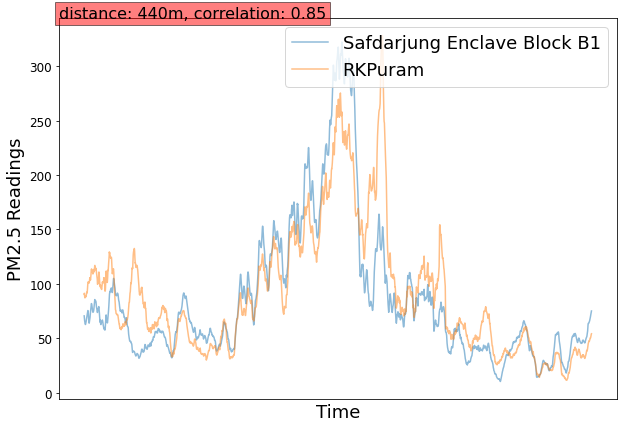

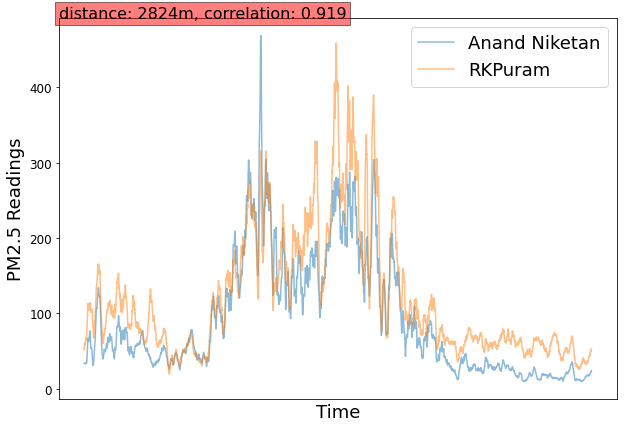

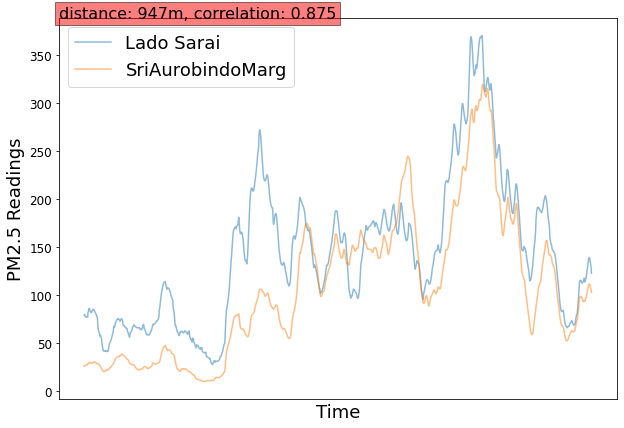

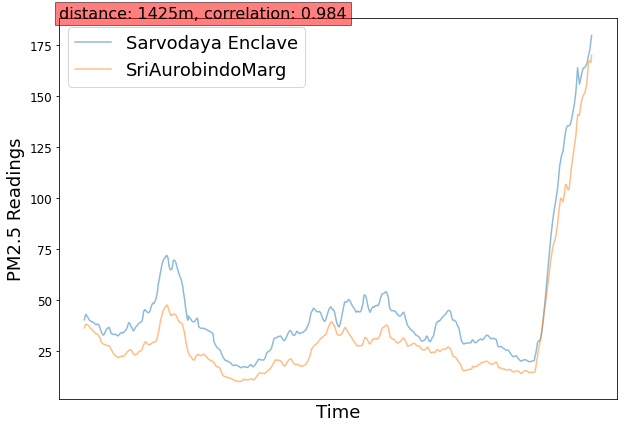

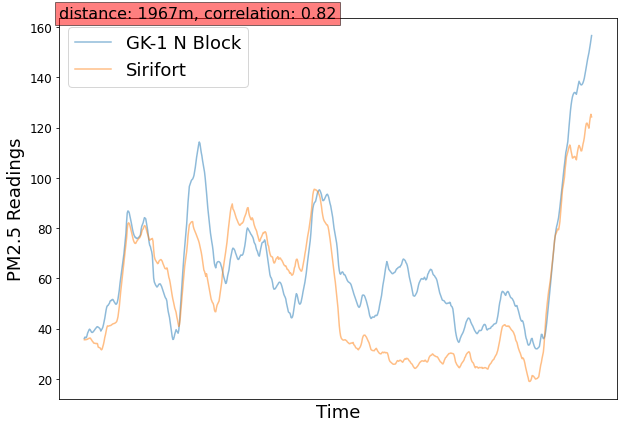

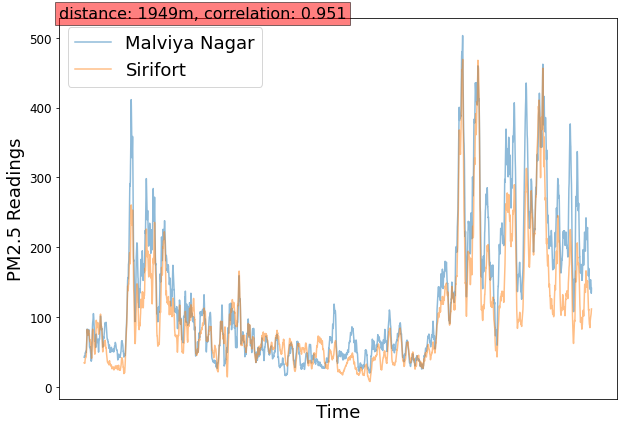

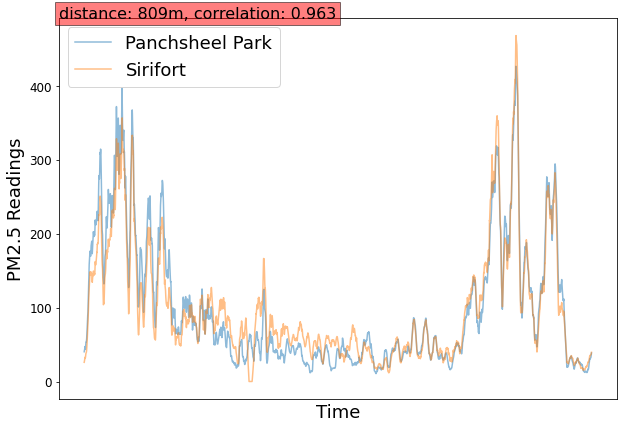

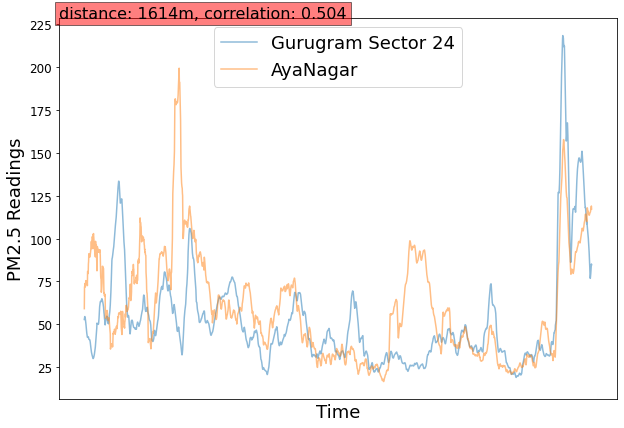

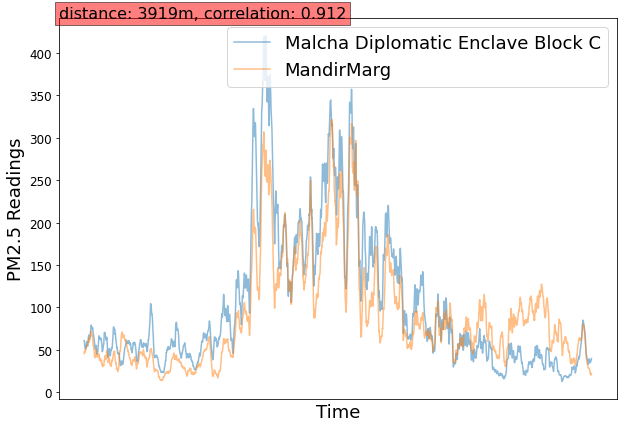

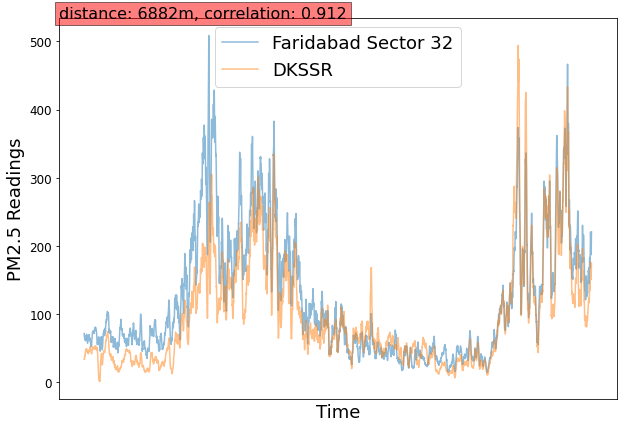

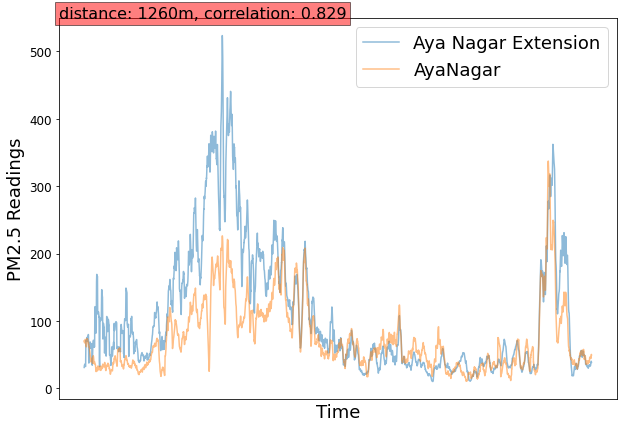

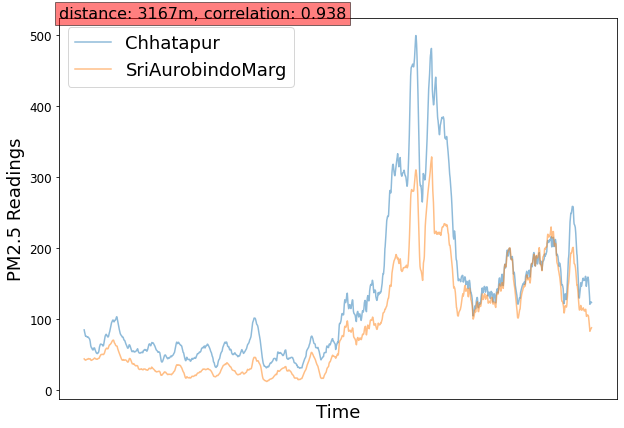

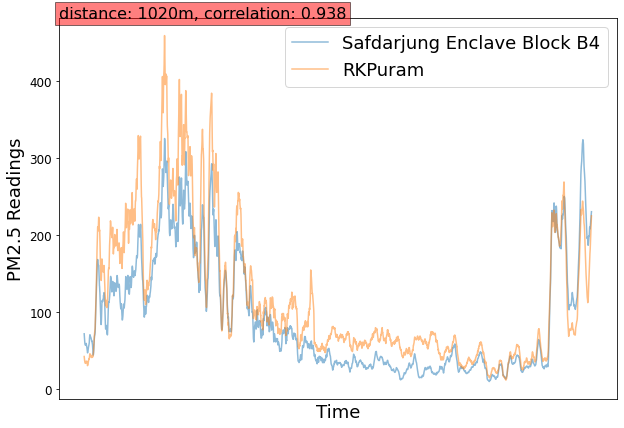

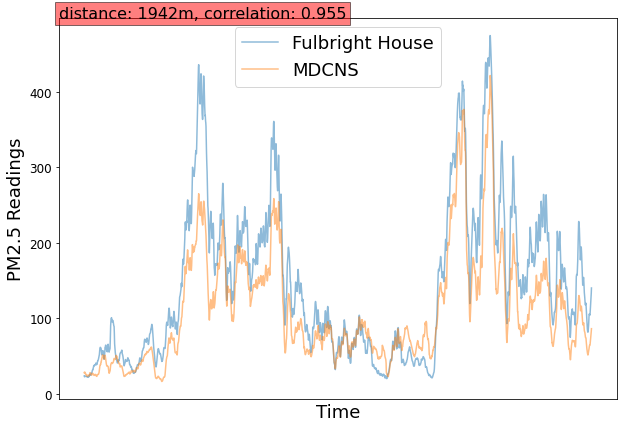

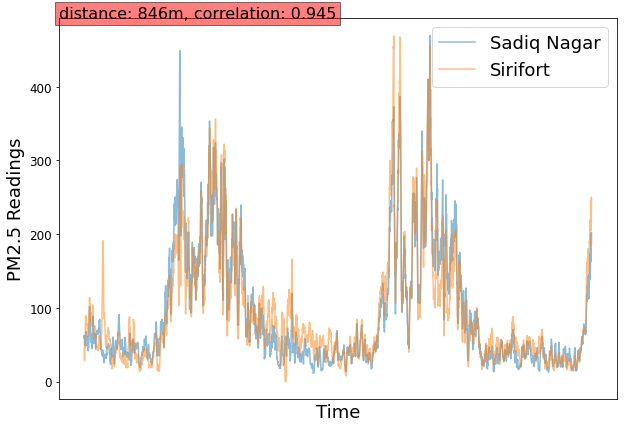

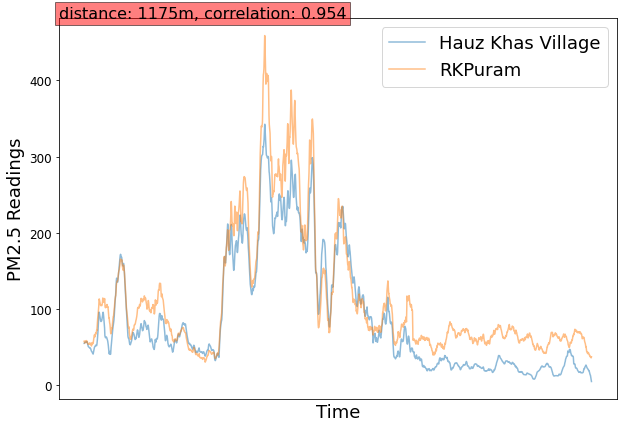

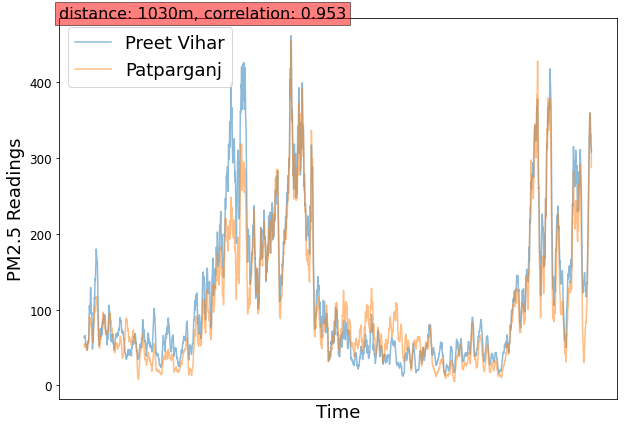

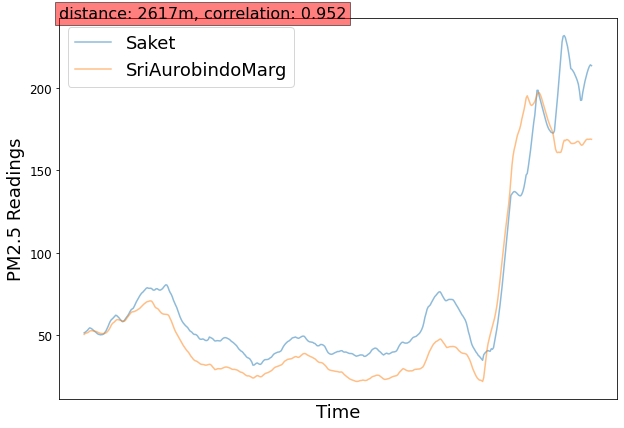

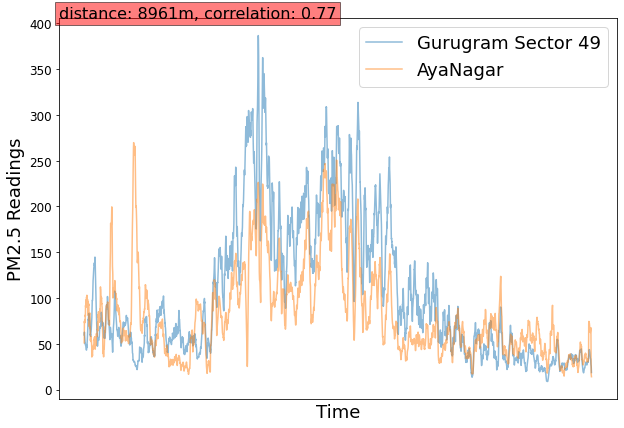

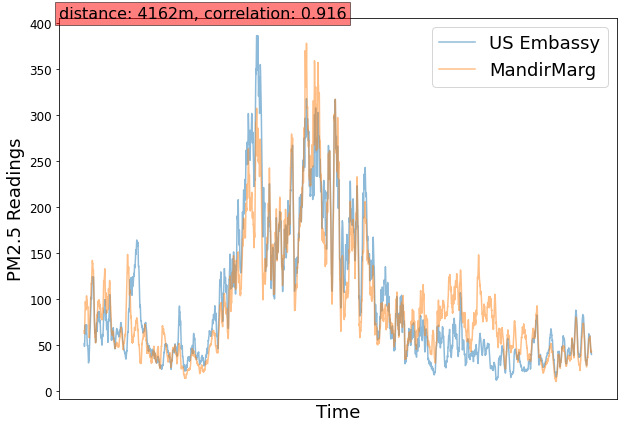

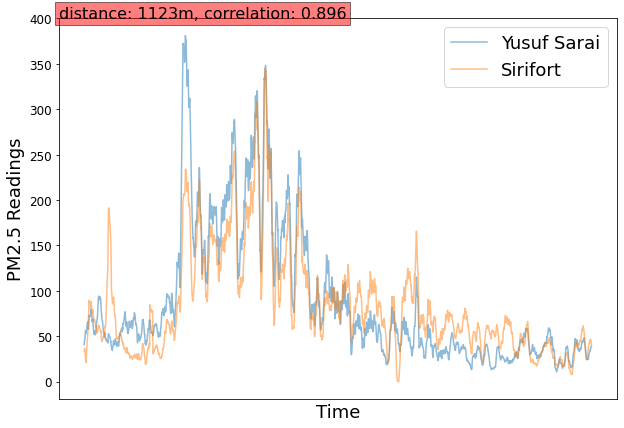

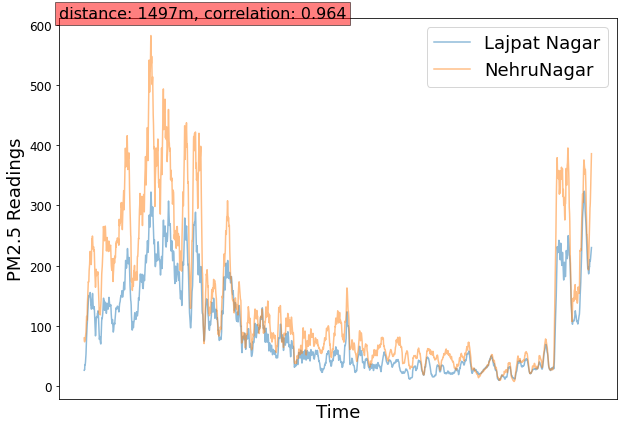

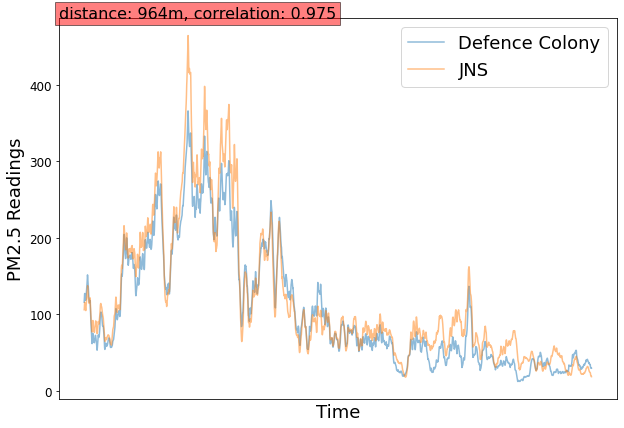

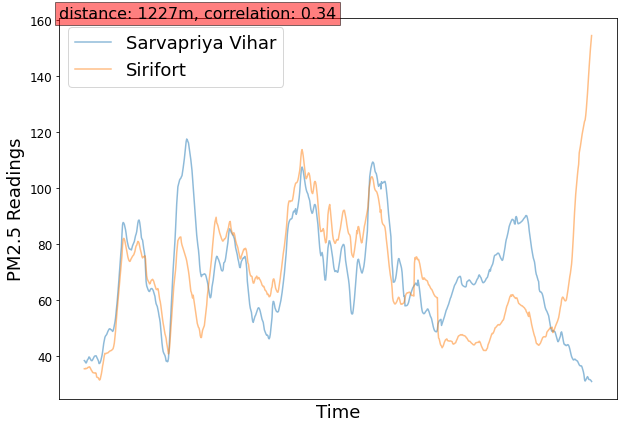

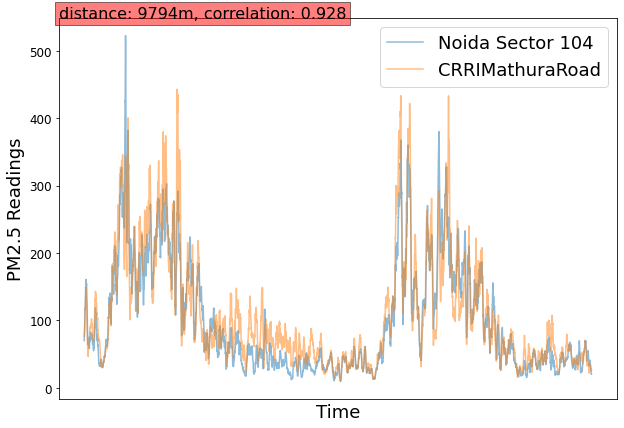

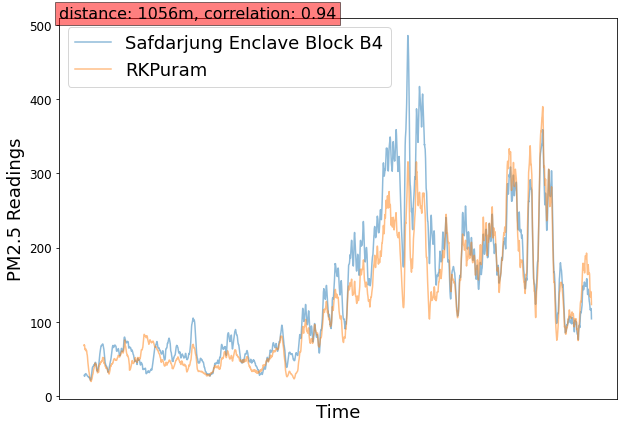

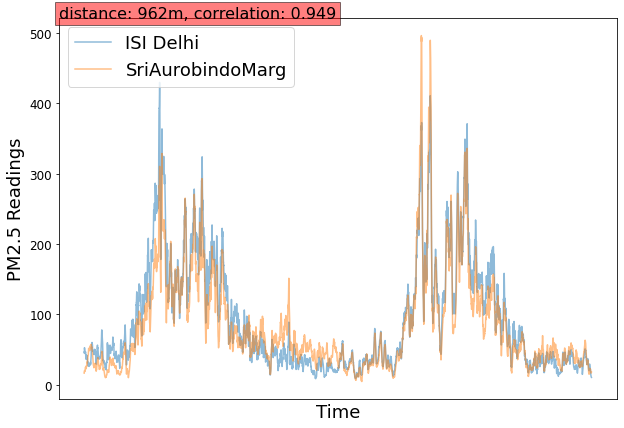

In [21]:
for kai_id, gov_id in kg_dict.items():
    kai_subset = kai_df[kai_df['field_egg_id']==kai_id].drop(columns=['field_egg_id']).set_index('timestamp_round')
    gov_subset = gov_df[gov_df['monitor_id']==gov_id].drop(columns=['monitor_id']).set_index('timestamp_round')
    kai_subset = kai_subset.dropna()
    gov_subset = gov_subset.loc[kai_subset.index]
    gov_subset = gov_subset.dropna()
    kai_subset = kai_subset.loc[gov_subset.index]
    kai_pm10 = kai_subset['pm10'].rolling(40, min_periods=1, center=True).apply(avg_win, raw=True).to_numpy()
    kai_pm25 = kai_subset['pm25'].rolling(40, min_periods=1, center=True).apply(avg_win, raw=True).to_numpy()
    gov_pm10 = gov_subset['pm10'].rolling(40, min_periods=1, center=True).apply(avg_win, raw=True).to_numpy()
    gov_pm25 = gov_subset['pm25'].rolling(40, min_periods=1, center=True).apply(avg_win, raw=True).to_numpy()
    ts = kai_subset.index.to_numpy()
    x_ts = range(len(ts))
    try:
        print(kai_id, gov_id, 'distance:', kg_dist.loc[kai_id].sort_values()[0], 'pm10_corr:',\
              pearsonr(kai_pm10, gov_pm10)[0],'pm25_corr:', pearsonr(kai_pm25, gov_pm25)[0])
        fig, ax = plt.subplots(figsize=(10,7))
        plt.xlabel("Time",fontsize=18)
        plt.ylabel("PM2.5 Readings",fontsize=18)
        ax.axes.xaxis.set_ticks([])
        plt.yticks(fontsize=12)
        ax.plot(x_ts, kai_pm25, alpha=0.5, label=locs.loc[kai_id].Location)
        ax.plot(x_ts, gov_pm25, alpha=0.5, label=gov_id.split("_")[0])
        plt.legend(prop={'size': 18})
        plt.text(0, 1, "distance: "+str(kg_dist.loc[kai_id].sort_values()[0])+\
                 "m, correlation: "+str(round(pearsonr(kai_pm25, gov_pm25)[0],3))\
                 ,bbox=dict(facecolor='red', alpha=0.5),transform=ax.transAxes,size=16)
        plt.savefig('/scratch/ab9738/epod-nyu-delhi-pollution/ankit/time_corr/'+kai_id+'_'+gov_id+'PM25.png')
    except:
        print(kai_id, gov_id, 'No Matching Data Points')

In [13]:
kai_gov_corr_df = pd.DataFrame(columns=['Kai_ID', 'Gov_ID', 'Distance', 'PM10_Corr', 'PM25_Corr'])

In [14]:
for kai_id, gov_id in kg_dict.items():
    kai_subset = kai_df[kai_df['field_egg_id']==kai_id].drop(columns=['field_egg_id']).set_index('timestamp_round')
    gov_subset = gov_df[gov_df['monitor_id']==gov_id].drop(columns=['monitor_id']).set_index('timestamp_round')
    kai_subset = kai_subset.dropna()
    gov_subset = gov_subset.loc[kai_subset.index]
    gov_subset = gov_subset.dropna()
    kai_subset = kai_subset.loc[gov_subset.index]
    kai_pm10 = kai_subset['pm10'].to_numpy()
    kai_pm25 = kai_subset['pm25'].to_numpy()
    gov_pm10 = gov_subset['pm10'].to_numpy()
    gov_pm25 = gov_subset['pm25'].to_numpy()
    ts = kai_subset.index.to_numpy()
    x_ts = range(len(ts))
    try:
        kai_gov_corr_df.loc[len(kai_gov_corr_df)] = [kai_id, gov_id, kg_dist.loc[kai_id].sort_values()[0],\
                                                     pearsonr(kai_pm10, gov_pm10)[0], pearsonr(kai_pm25, gov_pm25)[0]]
    except:
        print(kai_id, gov_id, 'No Matching Data Points')

D385 RKPuram_DPCC No Matching Data Points


In [16]:
kai_gov_corr_df.to_csv('kai_gov_correlations.csv')

In [33]:
kai_kai_corr_df = pd.DataFrame(columns=kai_ids)
for kai_id1 in kai_ids:
    kai_kai_corr_df.loc[kai_id1] = np.empty(len(kai_ids))
    for kai_id2 in kai_ids:
        kai_subset_1 = kai_df[kai_df['field_egg_id']==\
                              kai_id1].drop(columns=['field_egg_id']).set_index('timestamp_round')
        kai_subset_2 = kai_df[kai_df['field_egg_id']==\
                              kai_id2].drop(columns=['field_egg_id']).set_index('timestamp_round')
        kai_subset_1 = kai_subset_1.dropna()
        kai_subset_2 = kai_subset_2.dropna()
        df = kai_subset_1.merge(kai_subset_2, how='inner', left_on=kai_subset_1.index, right_on=kai_subset_2.index)
        kai1_pm10 = df['pm10_x'].to_numpy()
        kai1_pm25 = df['pm25_x'].to_numpy()
        kai2_pm10 = df['pm10_y'].to_numpy()
        kai2_pm25 = df['pm25_y'].to_numpy()
        try:
            kai_kai_corr_df[kai_id2].loc[kai_id1] = pearsonr(kai1_pm25, kai2_pm25)[0]
        except:
            print(kai_id1, kai_id2, 'No Matching Data Points')
kai_kai_corr_df.to_csv('kai_kai_pm25_corr.csv')

113E D385 No Matching Data Points
113E E47A No Matching Data Points
1FD7 D385 No Matching Data Points
20CA D385 No Matching Data Points
2E9C D385 No Matching Data Points
3ACF D385 No Matching Data Points
3ACF E47A No Matching Data Points
498F A838 No Matching Data Points
498F D385 No Matching Data Points
4BE7 D385 No Matching Data Points
56C3 D385 No Matching Data Points
56C3 E47A No Matching Data Points
5D7A D385 No Matching Data Points
603A D385 No Matching Data Points
603A E47A No Matching Data Points
72CA D385 No Matching Data Points
8E2A D385 No Matching Data Points
8E2A E47A No Matching Data Points
91B8 D385 No Matching Data Points
97D7 BFDC No Matching Data Points
97D7 D385 No Matching Data Points
97D7 E47A No Matching Data Points
A838 498F No Matching Data Points
A838 BFDC No Matching Data Points
A838 D385 No Matching Data Points
A838 E47A No Matching Data Points
A9BE D385 No Matching Data Points
BB4A D385 No Matching Data Points
BC46 D385 No Matching Data Points
BFDC 97D7 No M

In [34]:
kai_kai_corr_df.to_csv('kai_kai_pm10_corr.csv')